In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

### The Dataset

This MNIST dataset contains a lot of examples:

* The MNIST training set contains 60,000 examples.
* The MNIST test set contains 10,000 examples.

Each example in the MNIST dataset consists of:

* A label specified by a [rater](https://developers.google.com/machine-learning/glossary/#rater).  Each label must be an integer from 0 to 9.  For example, in the preceding image, the rater would almost certainly assign the label `1` to the example.
* A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.  

This is a multi-class classification problem with 10 output classes, one for each digit.

In [4]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

### Visualizing a example

In [5]:
x_train[2917]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 100, 156, 239, 224, 177, 213, 159,  70,  13,   0,   0

### Visualizing with matplotlib

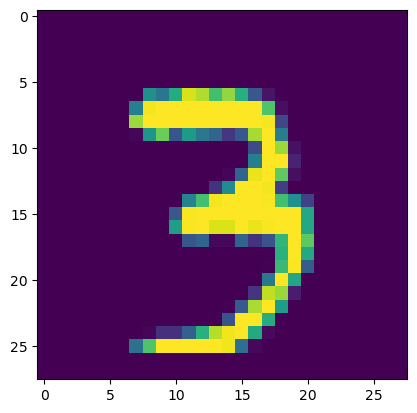

In [6]:
plt.imshow(x_train[2917])

### Normalizing feature values

Map [0, 255] to [0.0, 1.0]

In [7]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

### Define the plotting function

In [8]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

### Create a Deep Neural Net model

The function below defines:
- the number of layers
- the number of nodes in each layer
- regularization layers
- the activation function of each layer

The **activation function of the output layer is softmax**, which will yield 10 different outputs for each example. Each of the 10 outputs provides the probability that the input example is a certain digit.

In [12]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))

  # Define the second hidden layer.   
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

### Invoke model functions

Epoch 1/50
12/12 [==============================] - 1s 35ms/step - loss: 1.0060 - accuracy: 0.6982 - val_loss: 0.3386 - val_accuracy: 0.9028
Epoch 2/50
12/12 [==============================] - 0s 22ms/step - loss: 0.3520 - accuracy: 0.8948 - val_loss: 0.2412 - val_accuracy: 0.9305
Epoch 3/50
12/12 [==============================] - 0s 21ms/step - loss: 0.2466 - accuracy: 0.9271 - val_loss: 0.1868 - val_accuracy: 0.9454
Epoch 4/50
12/12 [==============================] - 0s 21ms/step - loss: 0.1910 - accuracy: 0.9434 - val_loss: 0.1552 - val_accuracy: 0.9550
Epoch 5/50
12/12 [==============================] - 0s 21ms/step - loss: 0.1578 - accuracy: 0.9534 - val_loss: 0.1360 - val_accuracy: 0.9602
Epoch 6/50
12/12 [==============================] - 0s 22ms/step - loss: 0.1340 - accuracy: 0.9604 - val_loss: 0.1263 - val_accuracy: 0.9630
Epoch 7/50
12/12 [==============================] - 0s 21ms/step - loss: 0.1157 - accuracy: 0.9654 - val_loss: 0.1136 - val_accuracy: 0.9645
Epoch 8/50
12

[0.09064056724309921, 0.9783999919891357]

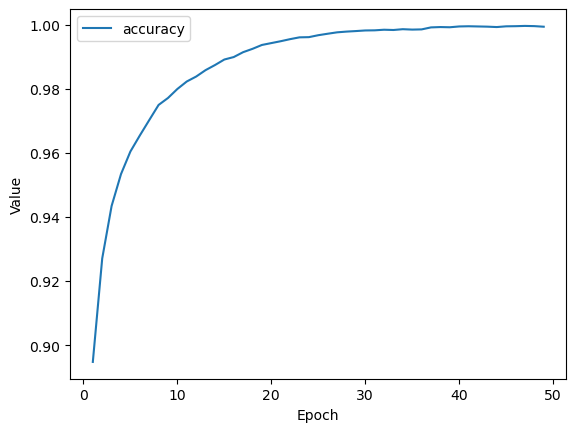

In [13]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

### Testing for 1 example

1/1 [==============================] - 0s 14ms/step
predicted: 4


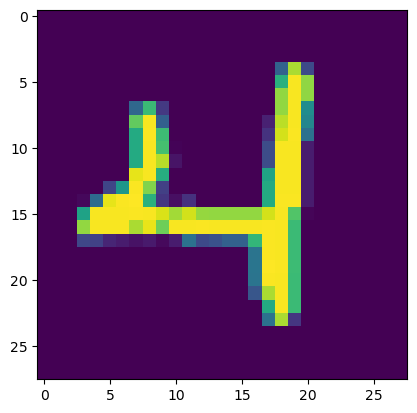

In [44]:
example_idx = np.random.randint(0, x_test_normalized.shape[0])

example = x_test_normalized[example_idx]

# Predict expects a batch of examples, so we need to add a dimension to the example
example = np.expand_dims(example, axis=0)

plt.imshow(example[0])

# Make a prediction. The output is the predicted digit.
prediction = my_model.predict(example).argmax()

print(f"predicted: {prediction}")